In [37]:
#we will same dataset as in logistic(linear) because both logistic and 
#knn is a classifier(non linear)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.cross_validation import train_test_split
#splitting data set
from sklearn.model_selection import train_test_split
#for creation of feature scaling
from sklearn.preprocessing import StandardScaler
#classifier for knn
from sklearn.neighbors import KNeighborsClassifier
#for confusion matrix
from sklearn.metrics import confusion_matrix

In [38]:
data = pd.read_csv(r'/Users/divyashahi/OneDrive - Adobe/Machine_Leaning_Material/Ads.csv')
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [39]:
#splitting data into input and output
real_x = data.iloc[:, 2:4].values
real_y = data.iloc[:, 4].values

In [40]:

#splitting training and testing dataset
train_x, test_x, train_y, test_y = train_test_split(real_x, real_y, test_size = 0.25, random_state = 0)

In [41]:
#feature scaling to minimise difference between independent
#var age , estimated salary
s_c = StandardScaler()
#scaling train and test data
train_x = s_c.fit_transform(train_x)
test_x = s_c.fit_transform(test_x)

In [42]:
#building regressor and than with the help of it will build model
#classifier
#n_neighbors = no of neighbors you want to consider
#metric = 'minikowski' uses euclidean distance to find neighbors
#p = 2 , for considering eculidean distance for minimkowski
cls = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p =2 )
#training model
cls.fit(train_x, train_y)

KNeighborsClassifier()

In [43]:
#validation
y_pred = cls.predict(test_x)

In [44]:
y_pred
#0 : user won't get car, 1 : user get caar

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [45]:
test_y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [46]:
#creating confusion matrix to know how much accurate our model is
#check right and wrong prediction in your model
#this needs accurate and predicted result
c_m = confusion_matrix(test_y, y_pred)
c_m

array([[64,  4],
       [ 3, 29]])

In [47]:
#accurate 29+64 = 93
#wrong = 7


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


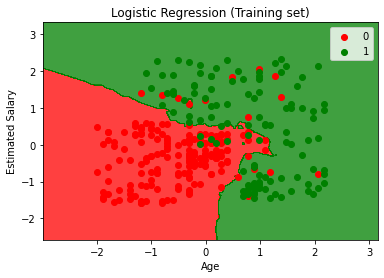

In [48]:
#plotting training data
#plotting logistic regression
#here our graph is diff because we have feature scaled to bring our data between +-2
from matplotlib.colors import ListedColormap
#we don't want our training data to get affected so we have stored them
#in two different copy
x_set, y_set = train_x, train_y
#to take the distribution of our data 
#we have splitted our data in +2 and -2
#X1 = min, X2 = max
#meshgrid helps in distribution of our data
#we are pointing points so we need matrix , start , end ,resolution
#koi point -2 pe directly aa skta toh -1 taki wo pura pura graph me

#visible ho
#step resolution 0.01

#to plot points here we will use contourf will help us
#to define data of x map and y map divide data

#ravel function finds out mid point
X1, X2 = np.meshgrid(np.arange(start = x_set[:,0].min() -1, stop = x_set[:, 0].max()+1, step = 0.01),
                    np.arange(start = x_set[:,1].min() -1, stop = x_set[:, 1].max()+1, step = 0.01))
plt.contourf(X1, X2, cls.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
                    
    
#logistic regression 
#will draw scaler plot with help of x and y variable
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)

plt.title("Logistic Regression (Training set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


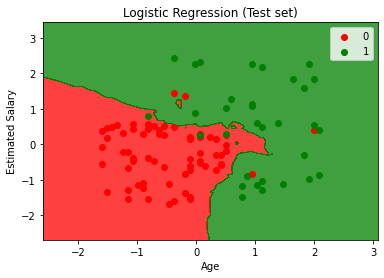

In [49]:
#plotting testing data
#plotting logistic regression
#here our graph is diff because we have feature scaled to bring our data between +-2
from matplotlib.colors import ListedColormap
#we don't want our training data to get affected so we have stored them
#in two different copy
x_set, y_set = test_x, test_y
#to take the distribution of our data 
#we have splitted our data in +2 and -2
#X1 = min, X2 = max
#meshgrid helps in distribution of our data
#we are pointing points so we need matrix , start , end ,resolution
#koi point -2 pe directly aa skta toh -1 taki wo pura pura graph me

#visible ho
#step resolution 0.01

#to plot points here we will use contourf will help us
#to define data of x map and y map divide data

#ravel function finds out mid point
X1, X2 = np.meshgrid(np.arange(start = x_set[:,0].min() -1, stop = x_set[:, 0].max()+1, step = 0.01),
                    np.arange(start = x_set[:,1].min() -1, stop = x_set[:, 1].max()+1, step = 0.01))
plt.contourf(X1, X2, cls.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
                    
    
#logistic regression 
#will draw scaler plot with help of x and y variable
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)

plt.title("Logistic Regression (Test set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [50]:
#in test data wrong predictions are : 7 though 8 

In [ ]:
#knn is more accurate than logistic